## Prediction

In [60]:
import pandas as pd
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
# Load best model, scaler and scaler configuration
with open("../Model/best_model_xgboost.pkl", "rb") as f:
    model = joblib.load(f)

with open("../Model/scaler.pkl", "rb") as f:
    scaler = joblib.load(f)

with open("../Model/scaler_config.json", "r") as f:
    scaler_config = json.load(f)

scaling_cols = scaler_config["scaling_cols"]

In [62]:
# Load test data for prediction
df_X = pd.read_csv("../Data/X_test.csv")
df_y = pd.read_csv("../Data/y_test.csv").squeeze()

In [63]:
# Scale the data with scaler
df_X_scaled = df_X.copy()
df_X_scaled[scaling_cols] = scaler.transform(df_X[scaling_cols])

In [64]:
predictions = model.predict(df_X_scaled)
print(f"The prediction results are:\n {predictions}")

The prediction results are:
 [0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1]


In [65]:
# Compare prediction results and true results
report = classification_report(df_y, predictions)
cm = confusion_matrix(df_y, predictions)

In [66]:
print("Classification report of predicted results\n")
print(report)

Classification report of predicted results

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       235
           1       0.86      0.87      0.87       117

    accuracy                           0.91       352
   macro avg       0.90      0.90      0.90       352
weighted avg       0.91      0.91      0.91       352



Observation:
- For non-tsunami events, the best model achieves a precision of 0.94 and a recall of 0.93, indicating the model is highly accurate at recognizing normal earthquake events that will not produce tsunamis.
- For tsunami events, the best model achieves a precision of 0.86 and a recall of 0.87, which is slightly lower than the non-tsunami events (probably due to the number of tsunami events is smaller than non-tsunami events) but still high.
- Overall, the model catches 93% of the non-tsunami events and 87% of the tsunami events with an accuracy of 0.91. It achieves strong performance and is reliable for both classes.

Confusion matrix of predicted results



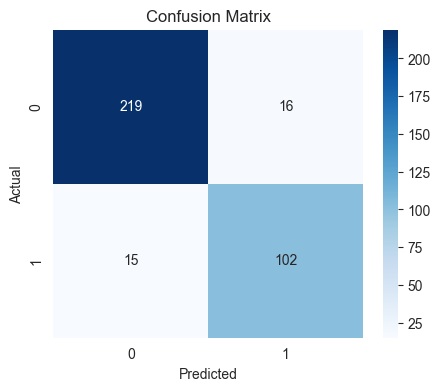

In [67]:
print("Confusion matrix of predicted results\n")
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Countplot of predicted results



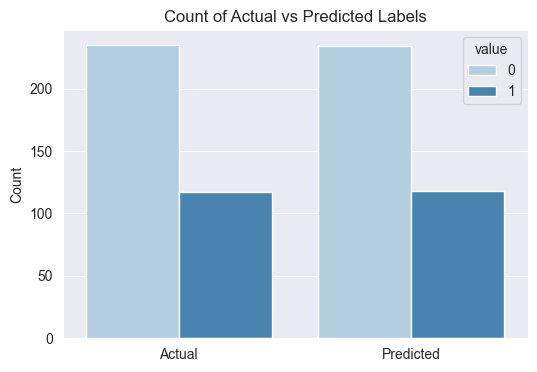

In [68]:
print("Countplot of predicted results\n")
df_compare = pd.DataFrame({
    "Actual": df_y,
    "Predicted": predictions
})

plt.figure(figsize=(6,4))
sns.countplot(data=df_compare.melt(), x="variable", hue="value", palette="Blues")
plt.title("Count of Actual vs Predicted Labels")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

Observation:
- The confusion matrix shows that the best model correctly classifies most cases, with 219 true negatives and 102 true positives. There are 15 false negatives and 16 false positives, meaning that the model is not biased towards any classes
- The countplot shows that the distribution of predicted labels closely matches the actual label distribution. This also indicates that the model is not biased.

#### Summary:
- In this project, we built an end-to-end machine learning pipeline to classify whether an earthquake event will produce a tsunami using the earthquake-tsunami dataset collected by us from the USGS website. Our project consists of three parts: experimental data analysis, data processing and modelling, and prediction.
- In the experimental data analysis part, we identified outliers and missing values, visualized numerical and categorical features, and explored correlations among various features. The insights we got from the analysis helped us with data cleaning decisions and feature engineering ideas.
- In the data processing and modelling part, we dropped unhelpful features, and performed feature engineering and scaling. We also experimented with different models and performed hyperparameter tuning on two of them. We saved the tuned XGBoost model as our best model.
- In the prediction part, we used our best model to predict on data. The model achieves an accuracy of 0.91, which indicates its high performance in classifying earthquake events.
- Our project also includes a Streamlit app to show prediction demo on unseen data.